In [ ]:
#Importing the necessary libraries for LSTM Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Reading the data and letting the system know that it is in date format
df = pd.read_csv('/content/monthly_milk_production.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'

In [ ]:
df.head()
#displaying the data

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


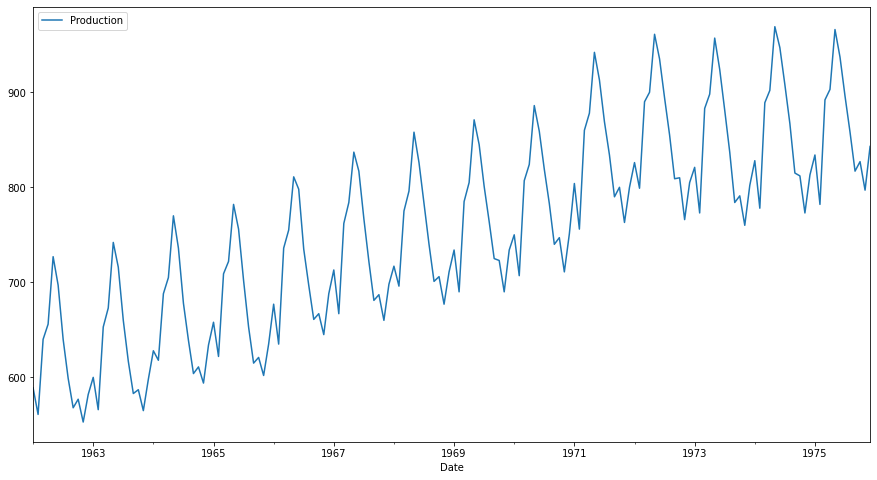

In [ ]:
df.plot(figsize=(15,8))
#Data Visualization

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
results = seasonal_decompose(df['Production'])
#Decomposing the production column and breaking it down into trend, noise and patterns

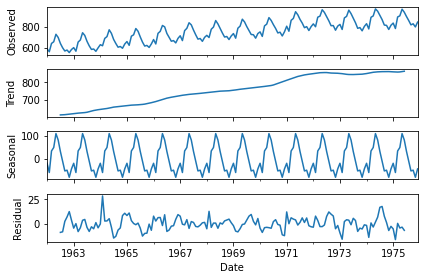

In [ ]:
results.plot();


In [ ]:
#calculating the length of data
len(df)


168

In [ ]:
train = df.iloc[:156]
test = df.iloc[156:] 
#Taking the first 156/168 values for training while the last 12 rows for testing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Importing MinMaxScaler for reducing the values down between 0 and 1

In [ ]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [ ]:
df.tail()


,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [ ]:

pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator


In [ ]:
# defining generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}') #reducing the dimensions of the list
print(f'Predict this y: \n {y}')


Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [ ]:
X.shape


(1, 3, 1)

In [ ]:
# We again perform the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
#Using the LSTM Model with relu activation function (rectified linear unit)
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
144/144 [==============================] - 4s 6ms/step - loss: 0.0393
Epoch 2/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0205
Epoch 3/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0151
Epoch 4/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0122
Epoch 5/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0078
Epoch 6/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0059
Epoch 7/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0032
Epoch 8/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0034
Epoch 9/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0049
Epoch 10/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0030
Epoch 11/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0044
Epoch 12/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0040
Epoch 13/50
144/144 [====

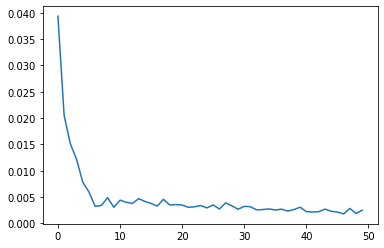

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]


In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))


In [ ]:
model.predict(last_train_batch) #prediction


array([[0.6061534]], dtype=float32)

In [ ]:
scaled_test[0]
#actual_value

array([0.67548077])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # getting the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # appending the prediction into the array
    test_predictions.append(current_pred) 
    
    # using the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions


[array([0.6061534], dtype=float32),
 array([0.58373594], dtype=float32),
 array([0.76630616], dtype=float32),
 array([0.83427477], dtype=float32),
 array([0.9299394], dtype=float32),
 array([0.9105948], dtype=float32),
 array([0.8342242], dtype=float32),
 array([0.7321843], dtype=float32),
 array([0.62729186], dtype=float32),
 array([0.58698946], dtype=float32),
 array([0.5452207], dtype=float32),
 array([0.5752719], dtype=float32)]

In [ ]:
test.head()


,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)


In [ ]:
test['Predictions'] = true_predictions


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


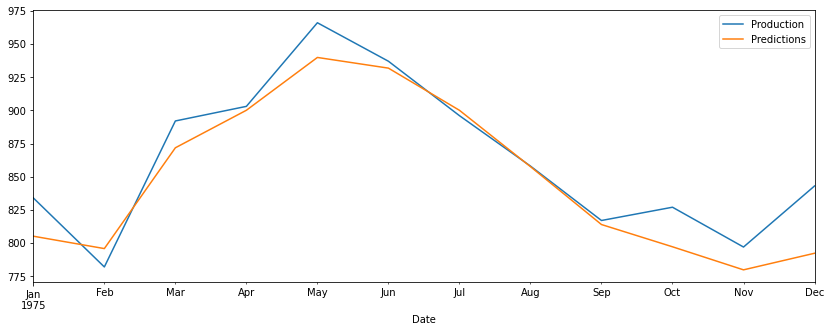

In [ ]:
test.plot(figsize=(14,5))


In [ ]:

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

22.23016667821259
